In [55]:
%matplotlib inline
import numpy as np
import tensorflow as tf
with np.load("notMNIST.npz") as data:
    images, labels = data["images"], data["labels"]
from matplotlib import pyplot as plt

[[4]
 [7]
 [5]
 ..., 
 [3]
 [4]
 [1]]


(28, 28, 2720)
[5]
(28, 28, 15000)


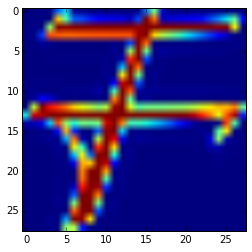

In [162]:
training_set = images[:,:,0:15000]
training_labels = labels[0:15000]
validation_set = images[:,:,15000:16000]
validation_labels = labels[15000:16000]
testing_set = images[:,:,16000:]
testing_labels = labels[16000:]

# Normalize
training_set = training_set / 255.0
#training_set = training_set.reshape(28*28, 15000).T
validation_set = validation_set / 255.0
#validation_set = validation_set.reshape(28*28, 1000).T
testing_set = testing_set / 255.0
#testing_set = testing_set.reshape(28*28, 2720).T


print testing_set.shape
plt.imshow(images[:,:,2])
print labels[2]
print training_set.shape

In [164]:
X = tf.placeholder("float", shape=(None, 28*28))
Y = tf.placeholder("float", shape=(None, 10))

W = tf.Variable(np.random.randn(28*28, 10).astype("float32"), name="weight")
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(np.random.randn(10).astype("float32"), name="bias")
b = tf.Variable(tf.zeros([10]))


probability = tf.nn.softmax(tf.matmul(X, W) + b)
cross_entropy = -tf.reduce_sum(Y * tf.log(probability))

train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(cross_entropy)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

num_of_input = training_set.shape[2]

training_labels_temp = []
for label in training_labels:
    temp = np.zeros(10)
    temp[label[0]] = 1
    training_labels_temp.append(temp)
training_labels_temp = np.array(training_labels_temp)

    

for i in range(1000):
    random_data_point = np.random.randint(num_of_input)
    batch_xs = training_set[:,:,random_data_point].reshape(28*28, 1).T
    batch_labels = training_labels_temp[random_data_point].reshape(10, 1).T
    sess.run(train_step, feed_dict={X: batch_xs, Y: batch_labels})

correct_prediction = tf.equal(tf.argmax(probability,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print sess.run(accuracy, feed_dict={X: training_set.reshape(28*28, num_of_input).T , Y: training_labels_temp})



0.692


In [83]:
correct_prediction = tf.equal(tf.argmax(probability,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print sess.run(accuracy, feed_dict={X: training_set.reshape(28*28, num_of_input).T , Y: training_labels_temp})


0.100133


In [62]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [126]:
batch_xs, batch_ys = mnist.train.next_batch(100)
#print batch_xs[0]
print training_set / 255.0

[[[ 0.6745098   0.59607843  0.         ...,  0.56862745  0.          0.        ]
  [ 1.          0.96470588  0.         ...,  0.96862745  0.          0.        ]
  [ 0.97254902  1.          0.00784314 ...,  1.          0.          0.        ]
  ..., 
  [ 1.          1.          0.         ...,  0.          0.01176471
    0.01176471]
  [ 1.          0.96470588  0.         ...,  0.          0.39215686  0.        ]
  [ 1.          0.59607843  0.         ...,  0.          0.31764706  0.        ]]

 [[ 0.71372549  0.          0.         ...,  0.          0.          0.        ]
  [ 1.          0.12156863  0.00392157 ...,  0.39215686  0.          0.        ]
  [ 0.99215686  0.32941176  0.         ...,  1.          0.          0.        ]
  ..., 
  [ 1.          0.32941176  0.35294118 ...,  0.          0.83529412  0.        ]
  [ 1.          0.12156863  0.46666667 ...,  0.          1.          0.01176471]
  [ 1.          0.          0.11372549 ...,  0.          0.61568627  0.        ]]

 [[ 0